In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

## Perform Batch Z-score normalization

In [2]:
def save_array_to_nifti1(array, original_img, destination_path, output_name):
    # Transform the array to a nifti image which requires the affine of the original image.
    processed_img = nib.Nifti1Image(array, original_img.affine)
    nib.save(processed_img, os.path.join(destination_path, output_name))

In [3]:
def apply_processing_to_img_folder (processing_function, source_path, destination_path, modification_string, inclusion_string="", **kwargs):
    files = os.listdir(source_path)
    
    # Select files to process.
    nifti_files = [file for file in files if (file.endswith('.nii.gz')) & (inclusion_string in file)]

    for file in nifti_files:
        file_path = os.path.join(source_path, file)
        nii_img = nib.load(file_path)
        nii_data = nii_img.get_fdata()
        new_img_name = os.path.splitext(os.path.splitext(file)[0])[0] + "_" + modification_string + ".nii.gz"
    
        # Apply processing_function to the array, then save it as a nifti file.
        save_array_to_nifti1(processing_function(nii_data, **kwargs), nii_img, destination_path, new_img_name)
        print("Processed image ", file)

In [4]:
def z_score_normalize_saturate_outliers(array, quantile_of_max=1.0):
    # Z_score normalizing with error handling and binning of outliers at the max of the
    # specified quantile.
    saturation_value = np.quantile(array, quantile_of_max)
    array[array >= saturation_value] = saturation_value
    
    if np.std(array) != 0.0:
        return ((array-np.mean(array))/np.std(array)).astype("float32")
    else:
        return array.astype("float32")

In [13]:
apply_processing_to_img_folder (z_score_normalize_saturate_outliers, "G:\\Data_Booster\\data_ETIS_781\\Resized_Images\\DIFF", "G:\\Data_Booster\\data_ETIS_781\\IntensityNormalized_Images\\DIFF", "Normalized")

Processed image  2018-104_01-10087-D0MR_106_AX_DIFF_RESOLVE_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10113-D0MR_3_Ax_Diffusion_b1000_Resized.nii.gz
Processed image  2018-104_01-10114-D0MR_3_Ax_Diffusion_b1000_Resized.nii.gz
Processed image  2018-104_01-10116-D0MR_5_AX_DIFFUSION_SMS_B2000_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10117-D0MR_3_Ax_Diffusion_b1000_Resized.nii.gz
Processed image  2018-104_01-10118-D0MR_141_AX_DIFF_RESOLVE_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10120-D0MR_55_AX_DIFF_RESOLVE_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10124-D0MR_3_Ax_DWI_Resized.nii.gz
Processed image  2018-104_01-10126-D0MR_105_AX_DIFF_RESOLVE_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10128-D0MR_3_Ax_DWI_Resized.nii.gz
Processed image  2018-104_01-10129-D0MR_105_AX_DIFF_RESOLVE_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10136-D0MR_105_AX_DIFF_RESOLVE_TRACEW_Resized.nii.gz
Processed image  2018-104_01-10151-D0MR_3_Ax_Diffusion_b1000_Resiz

In [7]:
def strip_word(word, name):
    return name.replace(word, "")

In [12]:
base_dir = "G:\\Data_Booster\\data_ETIS_781\\Discretized_Images\\500_bins\\FLAIR"
for file in os.listdir(base_dir):
    os.rename(os.path.join(base_dir, file), os.path.join(base_dir, strip_word("_Normalized", file))) 

## Visualize Histograms

In [2]:
def compute_img_histograms (source_path, histogram_bins, files_to_process=None):
    files = os.listdir(source_path)
    
    if files_to_process is None:
        nifti_files = [file for file in files if file.endswith('.nii.gz')]
    else:
        nifti_files = [file for file in files if file.endswith('.nii.gz')][:files_to_process]

    histogram_list = []

    for file in nifti_files:
        file_path = os.path.join(source_path, file)
        nii_img = nib.load(file_path)
        nii_data = nii_img.get_fdata()
        histogram_list.append(np.histogram(nii_data.flatten(), bins=histogram_bins))
    
    return histogram_list

In [4]:
hist_list = compute_img_histograms("D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train", 500, 10)

In [25]:
hist_list_norm = compute_img_histograms("D:\\data_processed_ETIS\\Intensity_Normalized_Images\\SkullStripped_Zscore_Normalize\\SWI", 500, 6)

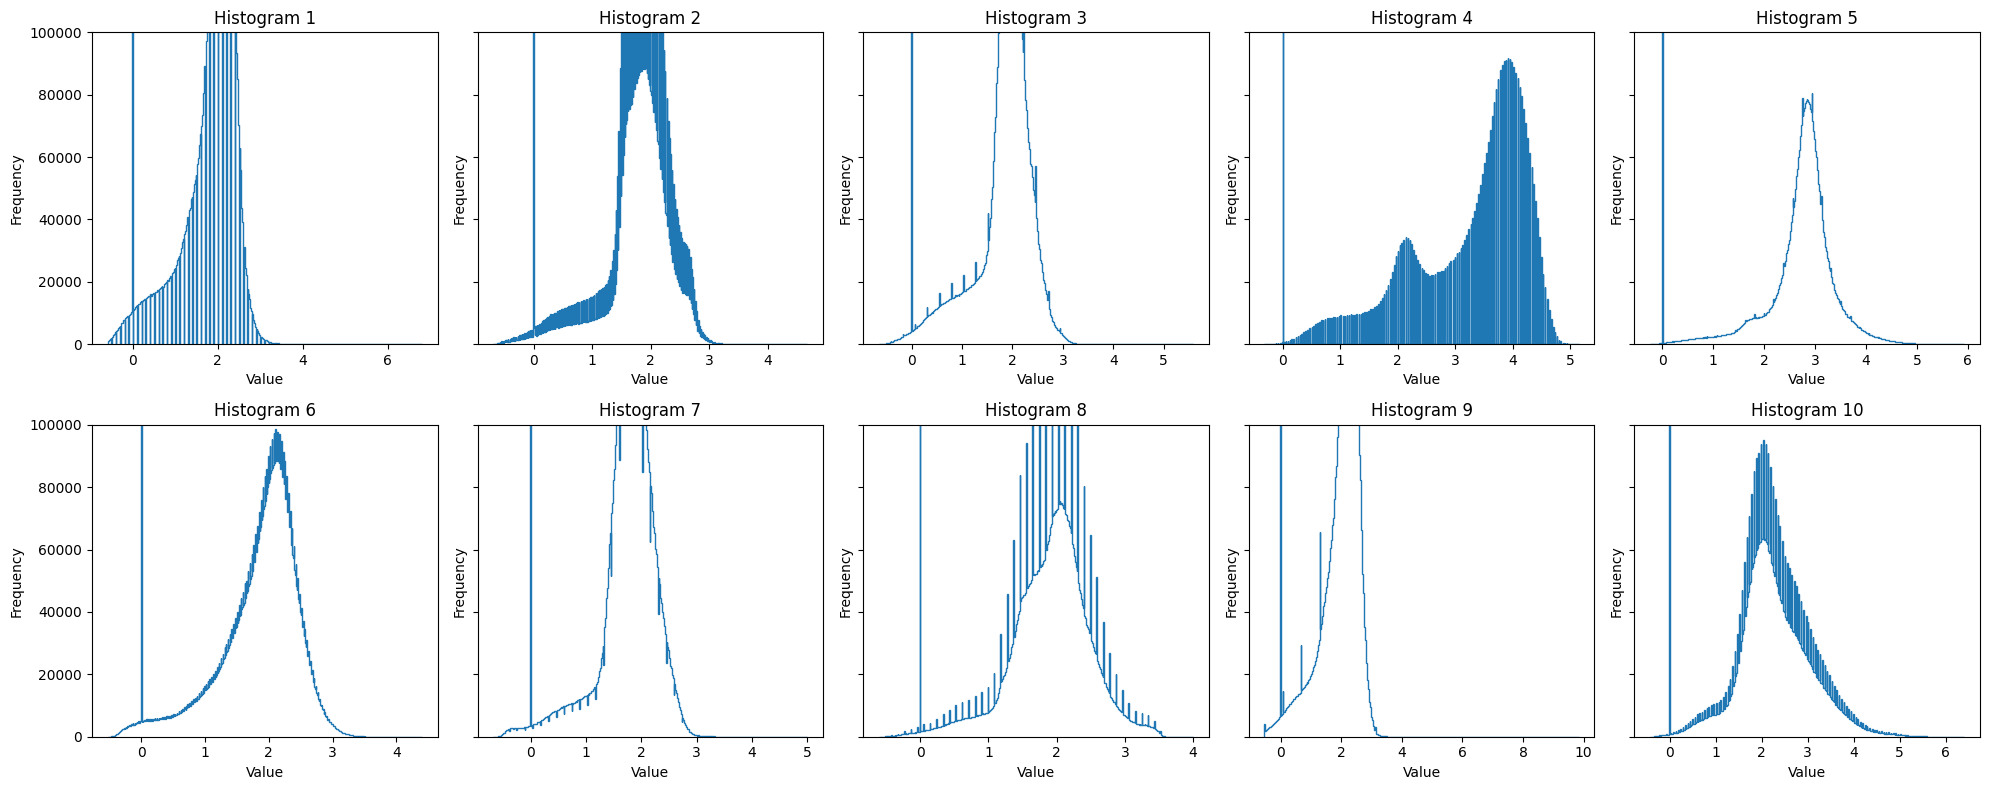

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8), sharey=True)

axs = axs.flatten()

for i, hist_data in enumerate(hist_list):
    counts, bins = hist_data
    
    # Compute histogram
    axs[i].hist(bins[:-1], bins, weights=counts, histtype="step")
    
    # Customize histogram appearance
    axs[i].set_title(f'Histogram {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_ylim(0,100000)

# Adjust layout
plt.tight_layout()
plt.show()

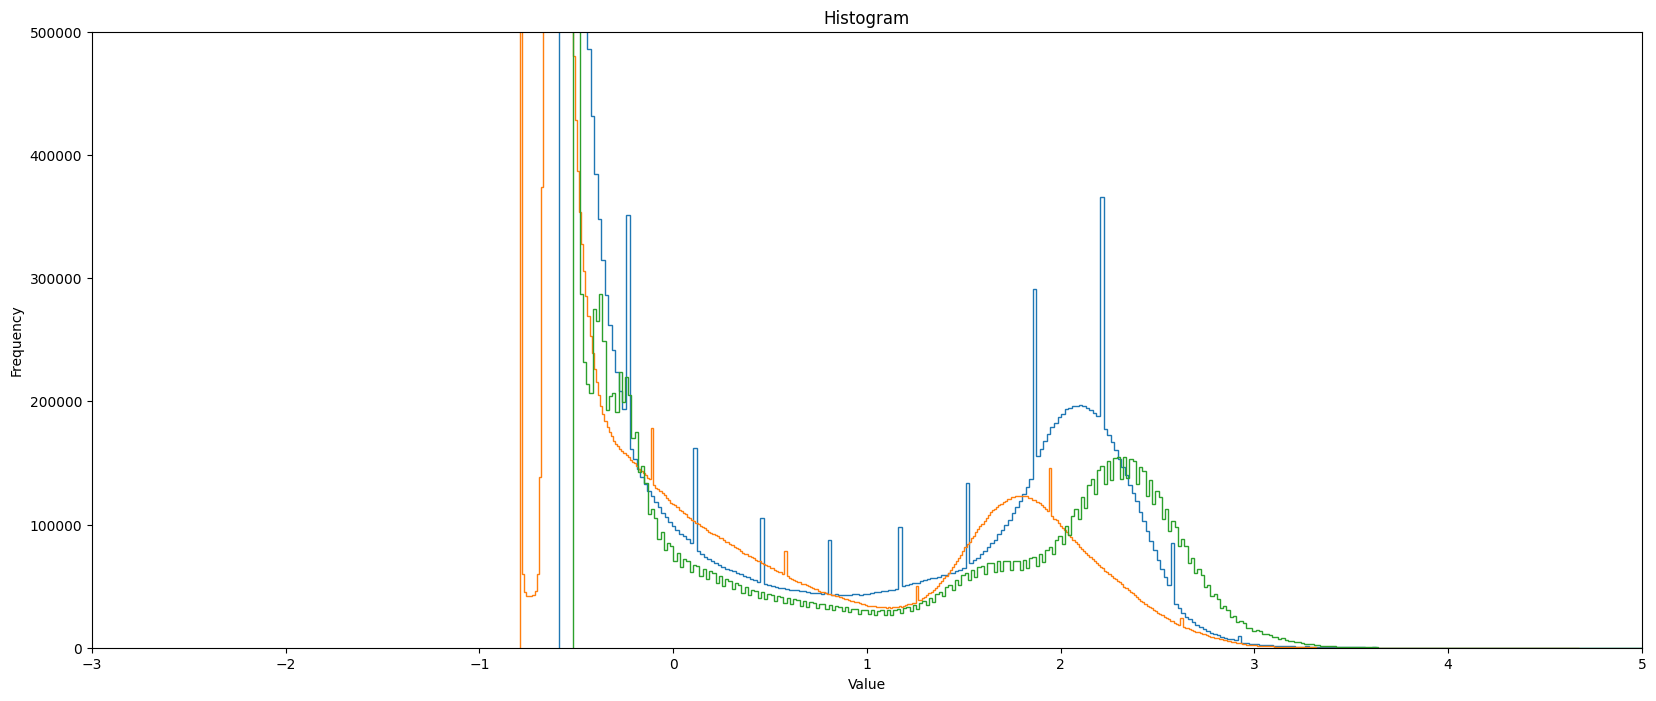

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))

for i, hist_data in enumerate(hist_list):
    counts, bins = hist_data
    
    plt.hist(bins[:-1], bins, weights=counts, histtype="step")
    
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_xlim(-3,5)
ax.set_ylabel('Frequency')
ax.set_ylim(0,500000)

plt.show()

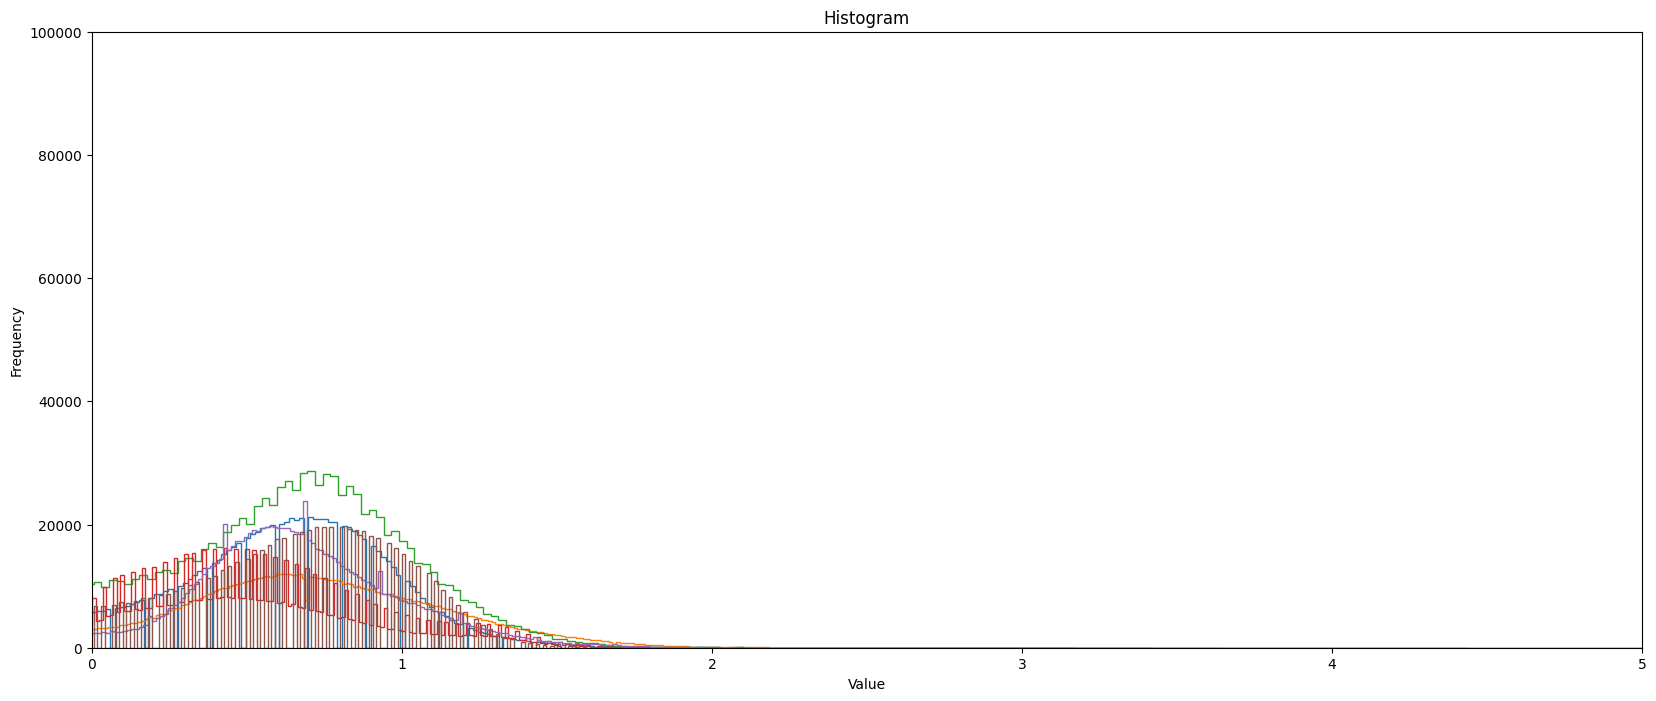

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))

for i, hist_data in enumerate(hist_list_norm):
    counts, bins = hist_data
    
    plt.hist(bins[:-1], bins, weights=counts, histtype="step")
    
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_xlim(0,5)
ax.set_ylabel('Frequency')
ax.set_ylim(0,100000)
plt.show()

In [14]:
swi_nii_img = nib.load("D:\\pythonscripts_ETIS\\SkullStripping_Check\\SWI_Resized\\2018-104_02-10241-D0MR_701_SWIp_50s_.nii.gz")
swi_nii_data = swi_nii_img.get_fdata()
tof_nii_img = nib.load("D:\\pythonscripts_ETIS\\SkullStripping_Check\\TOF3D_Resized\\2018-104_02-10241-D0MR_401_TOF_MC4_0.8x1.3_.nii.gz")
tof_nii_data = tof_nii_img.get_fdata()

In [23]:
swi_ss_nii_img = nib.load("D:\\pythonscripts_ETIS\\SkullStripping_Check\\SkullStripped_SWI_zscore_saturated\\2018-104_02-10241-D0MR_701_SWIp_50s__SkullStripped.nii.gz")
swi_ss_nii_data = swi_nii_img.get_fdata()